In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from warnings import filterwarnings
import missingno as msno
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
filterwarnings("ignore")

In [146]:
data=pd.read_csv("C:/Users/User/Desktop/top250-00-19.csv")

<b>Examining the Data Set Structure</b>

In [147]:
df=data.copy()

In [148]:
df.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NaN,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NaN,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,NaN,23000000


In [149]:
df.tail(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4690,Marco Carraro,Defensive Midfield,20,Inter,Serie A,Atalanta,Serie A,2018-2019,800000.0,5000000
4691,Jonathan Ikoné,Attacking Midfield,20,Paris SG,Ligue 1,LOSC Lille,Ligue 1,2018-2019,700000.0,5000000
4692,Giangiacomo Magnani,Centre-Back,22,Juventus,Serie A,Sassuolo,Serie A,2018-2019,600000.0,5000000
4693,Giangiacomo Magnani,Centre-Back,22,Perugia,Serie B,Juventus,Serie A,2018-2019,600000.0,5000000
4694,Evan N'Dicka,Centre-Back,18,AJ Auxerre,Ligue 2,E. Frankfurt,1.Bundesliga,2018-2019,400000.0,5000000
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000
4699,Kyle Bartley,Centre-Back,27,Swansea,Championship,West Brom,Championship,2018-2019,3500000.0,4500000


In [150]:
df.dtypes

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
dtype: object

In [151]:
df.isnull().sum()
#Missing Value Analysis

Name               0
Position           0
Age                0
Team_from          0
League_from        0
Team_to            0
League_to          0
Season             0
Market_value    1260
Transfer_fee       0
dtype: int64

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [153]:
df.shape

(4700, 10)

In [154]:
df.columns

Index(['Name', 'Position', 'Age', 'Team_from', 'League_from', 'Team_to',
       'League_to', 'Season', 'Market_value', 'Transfer_fee'],
      dtype='object')

In [155]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4700.0,2.433872e+01,3.230809e+00,0.0,22.0,24.0,27.0,35.0
Market_value,3440.0,8.622469e+06,8.795181e+06,50000.0,3500000.0,6000000.0,10000000.0,120000000.0
Transfer_fee,4700.0,9.447586e+06,1.043772e+07,825000.0,4000000.0,6500000.0,10820000.0,222000000.0


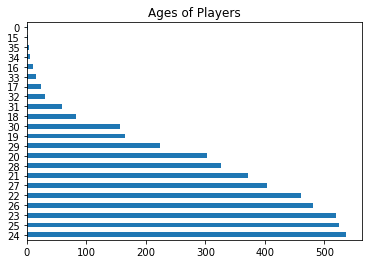

In [156]:
df["Age"].value_counts().plot.barh().set_title("Ages of Players");

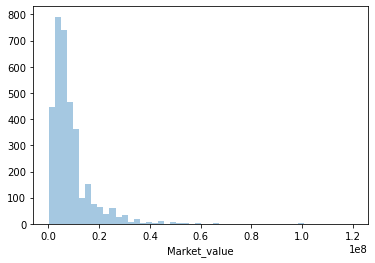

In [157]:
sns.distplot(df.Market_value,kde=False)

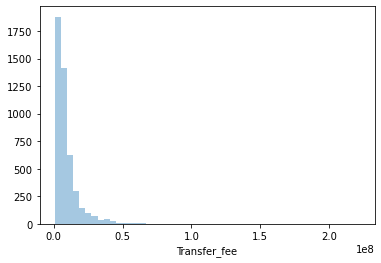

In [158]:
sns.distplot(df.Transfer_fee,kde=False)

<b>Outliers</b>

In [159]:
#Age Outliers
df_age=df["Age"]
df_age.head(10)

0    27
1    25
2    27
3    31
4    21
5    22
6    26
7    26
8    22
9    25
Name: Age, dtype: int64

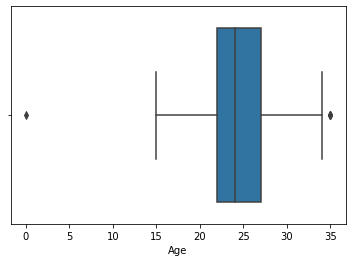

In [160]:
sns.boxplot(x=df_age);

In [161]:
Q1=df_age.quantile(0.25)
Q3=df_age.quantile(0.75)
IQR=Q3-Q1

In [162]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [163]:
outlier_age=(df_age<low_limit)|(df_age>up_limit)

In [164]:
df_age[outlier_age]

112     35
236      0
487     35
2414    35
2954    35
Name: Age, dtype: int64

In [165]:
df_age[236]

0

In [166]:
df_age[236]=df_age.mean()

In [167]:
df_age[236]

24

In [168]:
df_mv=df["Market_value"]

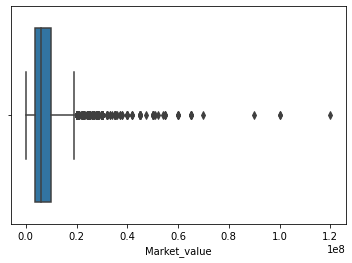

In [169]:
sns.boxplot(x=df_mv);

In [170]:
df_tf=df["Transfer_fee"]

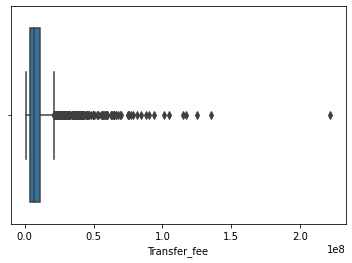

In [171]:
sns.boxplot(x=df_tf)

<b>Missing Values</b>

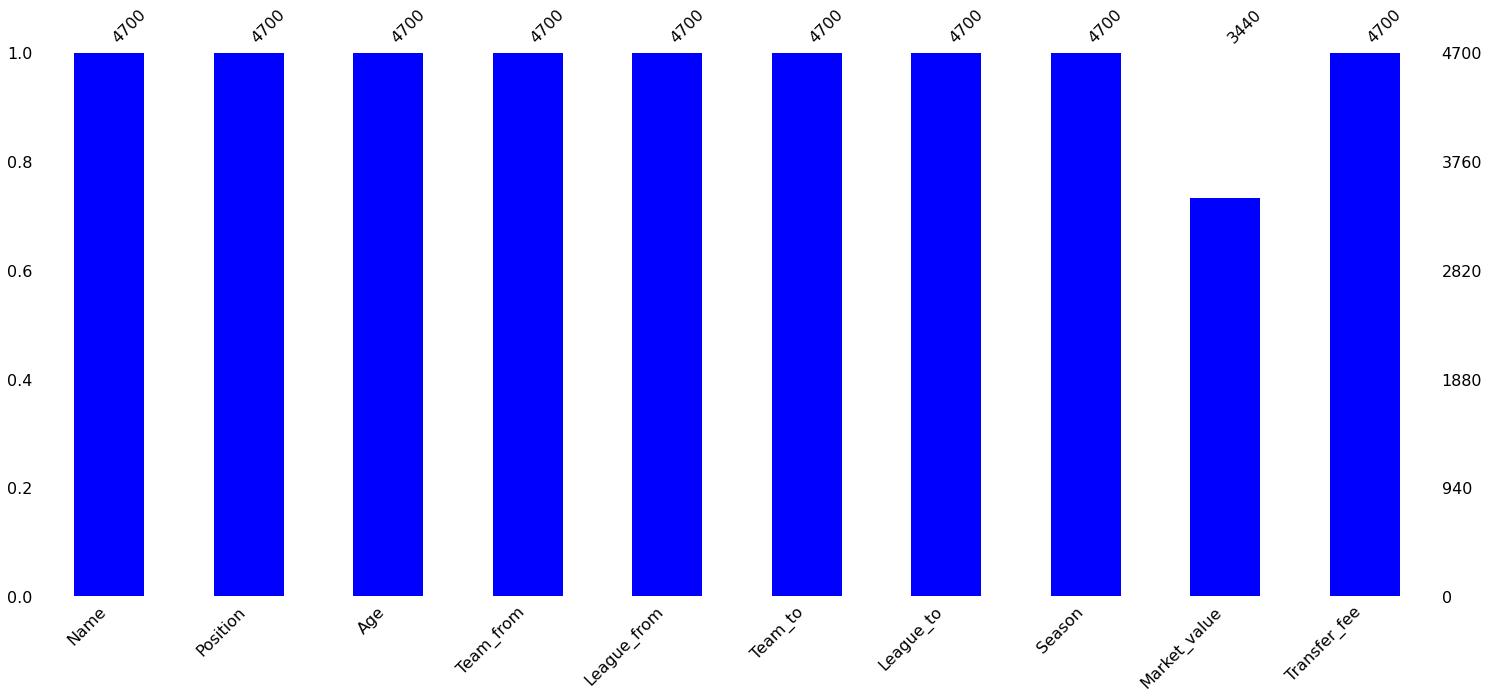

In [172]:
msno.bar(df,color="blue")

In [173]:
df["Market_value"].fillna(df["Market_value"].mean(),inplace=True)

In [174]:
df.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,8.622469e+06,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,8.622469e+06,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,8.622469e+06,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,8.622469e+06,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,8.622469e+06,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,8.622469e+06,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,8.622469e+06,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,8.622469e+06,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,8.622469e+06,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,8.622469e+06,23000000


<b>Variable Conversion</b>

In [175]:
df_one_hot=pd.get_dummies(df,columns=["Position","Season"],prefix=["Position","Season"])

In [176]:
df_one_hot.head()

,Name,Age,Team_from,League_from,Team_to,League_to,Market_value,Transfer_fee,Position_Attacking Midfield,Position_Central Midfield,...,Season_2009-2010,Season_2010-2011,Season_2011-2012,Season_2012-2013,Season_2013-2014,Season_2014-2015,Season_2015-2016,Season_2016-2017,Season_2017-2018,Season_2018-2019
0,Luís Figo,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,8.622469e+06,60000000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hernán Crespo,25,Parma,Serie A,Lazio,Serie A,8.622469e+06,56810000,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Marc Overmars,27,Arsenal,Premier League,FC Barcelona,LaLiga,8.622469e+06,40000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gabriel Batistuta,31,Fiorentina,Serie A,AS Roma,Serie A,8.622469e+06,36150000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nicolas Anelka,21,Real Madrid,LaLiga,Paris SG,Ligue 1,8.622469e+06,34500000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
df_one_hot.drop(["Name","Team_from","League_from","Team_to","League_to"],axis=1,inplace=True)

In [178]:
df_one_hot.head()

,Age,Market_value,Transfer_fee,Position_Attacking Midfield,Position_Central Midfield,Position_Centre-Back,Position_Centre-Forward,Position_Defender,Position_Defensive Midfield,Position_Forward,...,Season_2009-2010,Season_2010-2011,Season_2011-2012,Season_2012-2013,Season_2013-2014,Season_2014-2015,Season_2015-2016,Season_2016-2017,Season_2017-2018,Season_2018-2019
0,27,8.622469e+06,60000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,8.622469e+06,56810000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,8.622469e+06,40000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31,8.622469e+06,36150000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,8.622469e+06,34500000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Modelling and Tuning</b>

In [179]:
new_df=df_one_hot

In [180]:
y = new_df["Transfer_fee"]
X = new_df.drop(["Transfer_fee"], axis=1)

In [181]:
X.head()

,Age,Market_value,Position_Attacking Midfield,Position_Central Midfield,Position_Centre-Back,Position_Centre-Forward,Position_Defender,Position_Defensive Midfield,Position_Forward,Position_Goalkeeper,...,Season_2009-2010,Season_2010-2011,Season_2011-2012,Season_2012-2013,Season_2013-2014,Season_2014-2015,Season_2015-2016,Season_2016-2017,Season_2017-2018,Season_2018-2019
0,27,8.622469e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,8.622469e+06,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,27,8.622469e+06,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31,8.622469e+06,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,8.622469e+06,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.25,
                                                  random_state=42)

<b>1.) KNN</b>

In [183]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)

In [184]:
knn_model.n_neighbors

5

In [185]:
knn_model.metric

'minkowski'

In [186]:
y_pred=knn_model.predict(X_test)

In [187]:
np.sqrt(mean_squared_error(y_test,y_pred))

7200437.928584917

In [188]:
knn_params={"n_neighbors": np.arange(1,30,1)}

In [189]:
knn=KNeighborsRegressor()

In [190]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [191]:
knn_cv_model.best_params_

{'n_neighbors': 9}

In [192]:
knn_tuned=KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)

In [193]:
y_pred=knn_model.predict(X_test)

In [194]:
np.sqrt(mean_squared_error(y_test,y_pred))

7200437.928584917

<b>2.) CART</b>

In [195]:
cart_model=DecisionTreeRegressor().fit(X_train,y_train)

In [196]:
y_pred=cart_model.predict(X_test)

In [197]:
np.sqrt(mean_squared_error(y_test,y_pred))

8088064.612803687

In [198]:
cart_params={"max_depth":[2,3,4,5,10,20],
            "min_samples_split":[2,10,5,30,50,10]}

In [199]:
cart_model=DecisionTreeRegressor()

In [200]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10).fit(X_train,y_train)

In [201]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [202]:
cart_tuned_model=DecisionTreeRegressor(max_depth=10,min_samples_split=50).fit(X_train,y_train)

In [203]:
y_pred=cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7578618.732043694

<b>3.) Random Forest</b>

In [204]:
rf_model=RandomForestRegressor(random_state=42).fit(X_train,y_train)

In [205]:
y_pred=rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

7058612.112041161

In [206]:
rf_params={"max_depth":[5,8],
          "max_features":[5,10],
          "n_estimators":[500,1000],
          "min_samples_split":[10,100]}

In [207]:
rf_cv_model=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [208]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [209]:
rf_model=RandomForestRegressor(random_state=42,max_depth=8,max_features=10,min_samples_split=10,n_estimators=1000)
rf_tuned=rf_model.fit(X_train,y_train)

In [210]:
y_pred=rf_tuned.predict(X_test)

In [211]:
np.sqrt(mean_squared_error(y_test,y_pred))

7671511.606342714

<b>4.) XGB</b>

In [212]:
xgb=XGBRegressor().fit(X_train,y_train)

In [213]:
y_pred=xgb.predict(X_test)

In [214]:
np.sqrt(mean_squared_error(y_test,y_pred))

6950681.411402883

In [215]:
xgb_params={"learning_rate":[0.1,0.5],
           "max_depth":[3,5,8],
           "n_estimators":[100,200,1000],
           "colsample_bytree":[0.4,1]}

In [216]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [217]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200}

In [218]:
xgb_tuned=XGBRegressor(colsample_bytree= 0.4,learning_rate= 0.1,max_depth= 3,n_estimators= 200).fit(X_train,y_train)

In [219]:
y_pred=xgb_tuned.predict(X_test)

In [220]:
np.sqrt(mean_squared_error(y_test,y_pred))

6569870.583297061

<b>5.) Light GBM</b>

In [221]:
lgb_model=LGBMRegressor().fit(X_train,y_train)

In [222]:
y_pred=lgb_model.predict(X_test)

In [223]:
np.sqrt(mean_squared_error(y_test,y_pred))

7119117.17018184

In [224]:
lgbm_params={"learning_rate":[0.01,0.1,0.5,1],
            "n_estimators":[20,40,100,200,500,1000],
            "max_depth":np.arange(1,11)}

In [225]:
lgbm_cv_model=GridSearchCV(lgb_model,lgbm_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [226]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [227]:
lgb_tuned=LGBMRegressor(learning_rate=0.1,max_depth=3,n_estimators=100).fit(X_train,y_train)

In [228]:
y_pred=lgb_tuned.predict(X_test)

In [229]:
np.sqrt(mean_squared_error(y_test,y_pred))

7124183.378954563

<b>6.) CatBoost</b>

In [230]:
catb_model=CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.049961
0:	learn: 9926965.6415036	total: 2ms	remaining: 1.99s
1:	learn: 9675312.8493393	total: 3.74ms	remaining: 1.87s
2:	learn: 9468615.4663015	total: 5.21ms	remaining: 1.73s
3:	learn: 9255644.7477025	total: 6.78ms	remaining: 1.69s
4:	learn: 9053803.3311547	total: 8.4ms	remaining: 1.67s
5:	learn: 8848922.8450011	total: 9.95ms	remaining: 1.65s
6:	learn: 8680520.0939783	total: 11.5ms	remaining: 1.63s
7:	learn: 8505770.8843091	total: 13ms	remaining: 1.61s
8:	learn: 8339691.0282678	total: 16.2ms	remaining: 1.78s
9:	learn: 8185248.4470852	total: 17.7ms	remaining: 1.75s
10:	learn: 8032597.3278724	total: 19.2ms	remaining: 1.72s
11:	learn: 7904782.8828477	total: 20.7ms	remaining: 1.7s
12:	learn: 7785809.5883915	total: 22.2ms	remaining: 1.69s
13:	learn: 7683954.3414278	total: 23.8ms	remaining: 1.67s
14:	learn: 7572066.4874966	total: 25.3ms	remaining: 1.66s
15:	learn: 7470874.4612298	total: 26.8ms	remaining: 1.65s
16:	learn: 7372883.3233189	total: 28.3ms	remaining: 1.63s
1

193:	learn: 5238368.4201429	total: 330ms	remaining: 1.37s
194:	learn: 5235944.0346391	total: 332ms	remaining: 1.37s
195:	learn: 5233969.9106017	total: 334ms	remaining: 1.37s
196:	learn: 5232158.9519323	total: 336ms	remaining: 1.37s
197:	learn: 5230698.0315582	total: 338ms	remaining: 1.37s
198:	learn: 5228188.2601084	total: 340ms	remaining: 1.37s
199:	learn: 5224754.9907243	total: 342ms	remaining: 1.37s
200:	learn: 5220459.5092494	total: 344ms	remaining: 1.37s
201:	learn: 5216475.8152666	total: 346ms	remaining: 1.37s
202:	learn: 5213114.2208957	total: 348ms	remaining: 1.37s
203:	learn: 5210946.8229785	total: 350ms	remaining: 1.37s
204:	learn: 5208374.8847223	total: 352ms	remaining: 1.36s
205:	learn: 5204255.3177693	total: 354ms	remaining: 1.36s
206:	learn: 5201536.6084939	total: 356ms	remaining: 1.36s
207:	learn: 5199297.3292327	total: 358ms	remaining: 1.36s
208:	learn: 5196828.7087958	total: 359ms	remaining: 1.36s
209:	learn: 5193069.7046661	total: 361ms	remaining: 1.36s
210:	learn: 51

376:	learn: 4858257.1011905	total: 660ms	remaining: 1.09s
377:	learn: 4856903.8875639	total: 662ms	remaining: 1.09s
378:	learn: 4855969.4680215	total: 664ms	remaining: 1.09s
379:	learn: 4853755.5916961	total: 666ms	remaining: 1.08s
380:	learn: 4853440.5436510	total: 667ms	remaining: 1.08s
381:	learn: 4851251.5944156	total: 669ms	remaining: 1.08s
382:	learn: 4850839.2890335	total: 671ms	remaining: 1.08s
383:	learn: 4848721.9211809	total: 672ms	remaining: 1.08s
384:	learn: 4847010.8009997	total: 675ms	remaining: 1.08s
385:	learn: 4846117.1443704	total: 676ms	remaining: 1.07s
386:	learn: 4845263.9574260	total: 678ms	remaining: 1.07s
387:	learn: 4845080.0246149	total: 680ms	remaining: 1.07s
388:	learn: 4844265.5695415	total: 681ms	remaining: 1.07s
389:	learn: 4842539.3574505	total: 683ms	remaining: 1.07s
390:	learn: 4841037.6113052	total: 685ms	remaining: 1.07s
391:	learn: 4839526.7369827	total: 687ms	remaining: 1.06s
392:	learn: 4837915.6380534	total: 689ms	remaining: 1.06s
393:	learn: 48

560:	learn: 4631907.8030068	total: 989ms	remaining: 774ms
561:	learn: 4631032.5647774	total: 991ms	remaining: 772ms
562:	learn: 4631003.4782741	total: 992ms	remaining: 770ms
563:	learn: 4630105.4531178	total: 994ms	remaining: 769ms
564:	learn: 4629714.2477409	total: 996ms	remaining: 767ms
565:	learn: 4628894.4569086	total: 998ms	remaining: 765ms
566:	learn: 4627526.2295573	total: 1000ms	remaining: 764ms
567:	learn: 4626764.1421114	total: 1s	remaining: 762ms
568:	learn: 4625352.8394325	total: 1s	remaining: 760ms
569:	learn: 4624174.8366993	total: 1s	remaining: 758ms
570:	learn: 4622596.0202170	total: 1.01s	remaining: 757ms
571:	learn: 4622453.1379021	total: 1.01s	remaining: 755ms
572:	learn: 4621691.5567546	total: 1.01s	remaining: 753ms
573:	learn: 4620641.3704735	total: 1.01s	remaining: 752ms
574:	learn: 4619860.1355376	total: 1.01s	remaining: 751ms
575:	learn: 4619834.1447221	total: 1.02s	remaining: 749ms
576:	learn: 4619352.8687936	total: 1.02s	remaining: 747ms
577:	learn: 4618709.77

750:	learn: 4481813.4929711	total: 1.32s	remaining: 438ms
751:	learn: 4480948.9935849	total: 1.32s	remaining: 437ms
752:	learn: 4479966.9157879	total: 1.32s	remaining: 435ms
753:	learn: 4478817.4113874	total: 1.33s	remaining: 433ms
754:	learn: 4478050.9237799	total: 1.33s	remaining: 431ms
755:	learn: 4477828.9932911	total: 1.33s	remaining: 430ms
756:	learn: 4476691.8834802	total: 1.33s	remaining: 428ms
757:	learn: 4475566.1088583	total: 1.33s	remaining: 426ms
758:	learn: 4475094.6192265	total: 1.34s	remaining: 424ms
759:	learn: 4473855.3493537	total: 1.34s	remaining: 423ms
760:	learn: 4472517.3245113	total: 1.34s	remaining: 421ms
761:	learn: 4472233.5365948	total: 1.34s	remaining: 419ms
762:	learn: 4472222.0170196	total: 1.34s	remaining: 417ms
763:	learn: 4470472.2652731	total: 1.34s	remaining: 416ms
764:	learn: 4469596.4113166	total: 1.35s	remaining: 414ms
765:	learn: 4468338.9980439	total: 1.35s	remaining: 412ms
766:	learn: 4467995.1666777	total: 1.35s	remaining: 410ms
767:	learn: 44

938:	learn: 4351619.0450812	total: 1.65s	remaining: 107ms
939:	learn: 4350631.9464676	total: 1.66s	remaining: 106ms
940:	learn: 4350063.3833816	total: 1.66s	remaining: 104ms
941:	learn: 4350054.7825496	total: 1.66s	remaining: 102ms
942:	learn: 4349625.4449415	total: 1.66s	remaining: 100ms
943:	learn: 4349295.3738921	total: 1.66s	remaining: 98.6ms
944:	learn: 4348993.1304169	total: 1.66s	remaining: 96.9ms
945:	learn: 4348229.2377383	total: 1.67s	remaining: 95.1ms
946:	learn: 4347011.7247410	total: 1.67s	remaining: 93.4ms
947:	learn: 4346515.7274869	total: 1.67s	remaining: 91.6ms
948:	learn: 4345900.4044051	total: 1.67s	remaining: 89.8ms
949:	learn: 4345390.5494288	total: 1.67s	remaining: 88.1ms
950:	learn: 4344911.9257371	total: 1.68s	remaining: 86.3ms
951:	learn: 4344036.7080542	total: 1.68s	remaining: 84.6ms
952:	learn: 4343582.1389409	total: 1.68s	remaining: 82.8ms
953:	learn: 4342767.0029621	total: 1.68s	remaining: 81ms
954:	learn: 4342305.9592182	total: 1.68s	remaining: 79.3ms
955:

In [231]:
y_pred=catb_model.predict(X_test)

In [232]:
np.sqrt(mean_squared_error(y_test,y_pred))

6800687.740896871

In [233]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.01,0.1],
            "depth":[3,6,8]}

In [234]:
catb_model=CatBoostRegressor()

In [235]:
catb_cv_model=GridSearchCV(catb_model,catb_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 9696423.4128525	total: 901us	remaining: 179ms
1:	learn: 9234541.5828320	total: 1.97ms	remaining: 195ms
2:	learn: 8828652.6231930	total: 2.85ms	remaining: 187ms
3:	learn: 8479745.5601569	total: 3.83ms	remaining: 188ms
4:	learn: 8172773.8627990	total: 4.77ms	remaining: 186ms
5:	learn: 7917549.1605475	total: 5.76ms	remaining: 186ms
6:	learn: 7697922.8817659	total: 6.65ms	remaining: 183ms
7:	learn: 7511926.4139100	total: 7.53ms	remaining: 181ms
8:	learn: 7345382.5060368	total: 8.42ms	remaining: 179ms
9:	learn: 7183003.1511569	total: 9.38ms	remaining: 178ms
10:	learn: 7066904.6483023	total: 10.3ms	remaining: 177ms
11:	learn: 6963665.4189812	total: 11.2ms	remaining: 175ms
12:	learn: 6845714.9225383	total: 12.1ms	remaining: 174ms
13:	learn: 6747580.7749339	total: 13ms	remaining: 172ms
14:	learn: 6669721.5343577	total: 13.9ms	remaining: 171ms
15:	learn: 6599961.3154499	total: 14.8ms	remaining: 170ms
16:	learn: 6535838.56994

165:	learn: 5339914.4294345	total: 153ms	remaining: 31.4ms
166:	learn: 5338485.6341544	total: 154ms	remaining: 30.5ms
167:	learn: 5334407.5116530	total: 155ms	remaining: 29.6ms
168:	learn: 5331184.8865726	total: 156ms	remaining: 28.6ms
169:	learn: 5328030.0422137	total: 157ms	remaining: 27.7ms
170:	learn: 5326823.7104816	total: 158ms	remaining: 26.8ms
171:	learn: 5323859.4800122	total: 159ms	remaining: 25.9ms
172:	learn: 5323244.5272491	total: 160ms	remaining: 25ms
173:	learn: 5321117.5954628	total: 161ms	remaining: 24ms
174:	learn: 5318065.2487007	total: 162ms	remaining: 23.1ms
175:	learn: 5316660.3389228	total: 163ms	remaining: 22.2ms
176:	learn: 5314546.7684512	total: 164ms	remaining: 21.3ms
177:	learn: 5312111.9673788	total: 165ms	remaining: 20.4ms
178:	learn: 5310398.0037904	total: 166ms	remaining: 19.4ms
179:	learn: 5307948.9064311	total: 167ms	remaining: 18.5ms
180:	learn: 5306268.1791841	total: 168ms	remaining: 17.6ms
181:	learn: 5302568.3276631	total: 169ms	remaining: 16.7ms
1

In [236]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [237]:
catb_tuned=CatBoostRegressor(depth=3, iterations=200, learning_rate=0.1).fit(X_train,y_train)

0:	learn: 9696423.4128525	total: 925us	remaining: 184ms
1:	learn: 9234541.5828320	total: 1.88ms	remaining: 186ms
2:	learn: 8828652.6231930	total: 2.71ms	remaining: 178ms
3:	learn: 8479745.5601569	total: 3.63ms	remaining: 178ms
4:	learn: 8172773.8627990	total: 4.5ms	remaining: 175ms
5:	learn: 7917549.1605475	total: 5.32ms	remaining: 172ms
6:	learn: 7697922.8817659	total: 6.11ms	remaining: 168ms
7:	learn: 7511926.4139100	total: 6.92ms	remaining: 166ms
8:	learn: 7345382.5060368	total: 7.72ms	remaining: 164ms
9:	learn: 7183003.1511569	total: 8.65ms	remaining: 164ms
10:	learn: 7066904.6483023	total: 9.55ms	remaining: 164ms
11:	learn: 6963665.4189812	total: 10.4ms	remaining: 163ms
12:	learn: 6845714.9225383	total: 11.3ms	remaining: 163ms
13:	learn: 6747580.7749339	total: 12.2ms	remaining: 162ms
14:	learn: 6669721.5343577	total: 13ms	remaining: 160ms
15:	learn: 6599961.3154499	total: 13.8ms	remaining: 159ms
16:	learn: 6535838.5699415	total: 14.7ms	remaining: 158ms
17:	learn: 6464946.0713077	t

164:	learn: 5341564.0824425	total: 145ms	remaining: 30.9ms
165:	learn: 5339914.4294345	total: 146ms	remaining: 30ms
166:	learn: 5338485.6341544	total: 147ms	remaining: 29.1ms
167:	learn: 5334407.5116530	total: 148ms	remaining: 28.2ms
168:	learn: 5331184.8865726	total: 149ms	remaining: 27.3ms
169:	learn: 5328030.0422137	total: 150ms	remaining: 26.4ms
170:	learn: 5326823.7104816	total: 151ms	remaining: 25.5ms
171:	learn: 5323859.4800122	total: 152ms	remaining: 24.7ms
172:	learn: 5323244.5272491	total: 152ms	remaining: 23.8ms
173:	learn: 5321117.5954628	total: 153ms	remaining: 22.9ms
174:	learn: 5318065.2487007	total: 154ms	remaining: 22ms
175:	learn: 5316660.3389228	total: 155ms	remaining: 21.2ms
176:	learn: 5314546.7684512	total: 156ms	remaining: 20.3ms
177:	learn: 5312111.9673788	total: 157ms	remaining: 19.4ms
178:	learn: 5310398.0037904	total: 158ms	remaining: 18.6ms
179:	learn: 5307948.9064311	total: 159ms	remaining: 17.7ms
180:	learn: 5306268.1791841	total: 160ms	remaining: 16.8ms
1

In [238]:
y_pred=catb_tuned.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test,y_pred))

6468006.183185609